<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters (k) = {best_k}")

k = 2, Silhouette Score = 0.5818
k = 3, Silhouette Score = 0.4599
k = 4, Silhouette Score = 0.3869
k = 5, Silhouette Score = 0.3459
k = 6, Silhouette Score = 0.3171
k = 7, Silhouette Score = 0.3202
k = 8, Silhouette Score = 0.3387
k = 9, Silhouette Score = 0.3424
k = 10, Silhouette Score = 0.3518

Best number of clusters (k) = 2


In [5]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels_
centers = kmeans_final.cluster_centers_

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(centers)

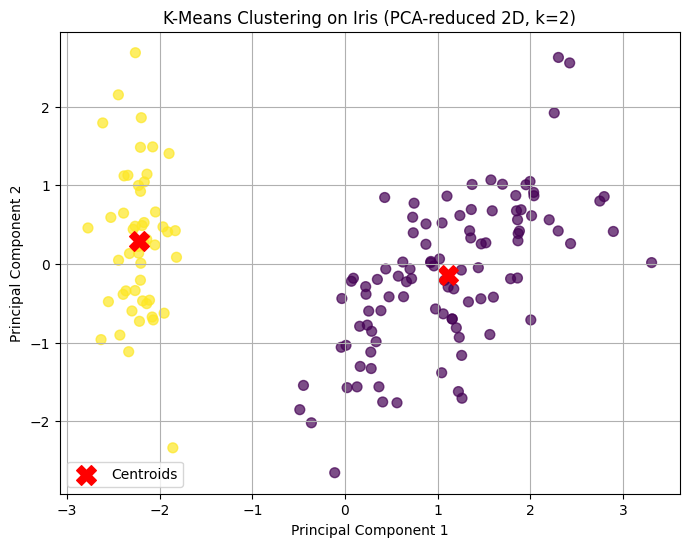

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering on Iris (PCA-reduced 2D, k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
0    100
1     50
Name: count, dtype: int64


In [9]:
comparison = pd.crosstab(labels, y_true, rownames=['Cluster'], colnames=['True Species'])
print("\nMapping of Clusters to True Species:")
print(comparison)


Mapping of Clusters to True Species:
True Species   0   1   2
Cluster                 
0              0  50  50
1             50   0   0


In [10]:
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Cluster Label'] = labels
iris_df['True Species'] = [iris.target_names[i] for i in y_true]

print("\nSample of Data with Cluster Labels:")
print(iris_df.head())


Sample of Data with Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster Label True Species  
0              1       setosa  
1              1       setosa  
2              1       setosa  
3              1       setosa  
4              1       setosa  
